# Airbnb In NYC? Where Is The Most Suitable Place?

# INTRODUCTION

**Title: NYC Airbnb Analysis**

**Author: Michelle Kurniawan**

**Date: 15 June 2023**

## Background
Airbnb has become a favorite choice for traveler because they have a cheaper price than hotel. Although airbnb has a smaller room, most of the people do not mind that. Airbnb operates online following current technology development. They provides an easy method to consumer. Therefore, the business continues to grow bigger and bigger. 

This time, i want to analyse airbnb in NYC. One of the most crowded city in the world. 

## Task
Analyse NYC Airbnb as a information for people who want to open airbnb.

## Objective
1. To find top 5 listing hosts and their places.
2. To find a suitable place to open airbnb.

This dataset is taken from Kaggle's Dataset named **"alldatasets"**.

# INSTALL LIBRARY

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# EXPORT DATA

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/alldatasets/census_block_loc.csv
/kaggle/input/alldatasets/listings-3.csv
/kaggle/input/alldatasets/NYPD_Complaint_Data.csv
/kaggle/input/alldatasets/AB_NYC_2019.csv
/kaggle/input/alldatasets/nyc_census_tracts.csv


In [3]:
# Read data name it as df
df = pd.read_csv('../input/alldatasets/AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# CLEANSING DATA

First, we want to know if there is a data with null value.

In [4]:
missing = df.isnull().sum()
missing

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

As you can see, there are some columns that have missing value. To manipulate the data, change null into 0.

In [5]:
df = df.fillna(0)

After change null value into zero, search every column datatype using .info()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

There is not a single column with null value and there are many datatype such as integer, float, and object (string).

# ANALYZE

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


There are some type of rooms if you see above. Find how many type of rooms in this dataset.

In [8]:
# count distinct value of "room_type"
unique_room = len(pd.unique(df["room_type"]))
  
print("# of unique Room Type: " + str(unique_room))

# of unique Room Type: 3


Plot the room type against the number of rooms.

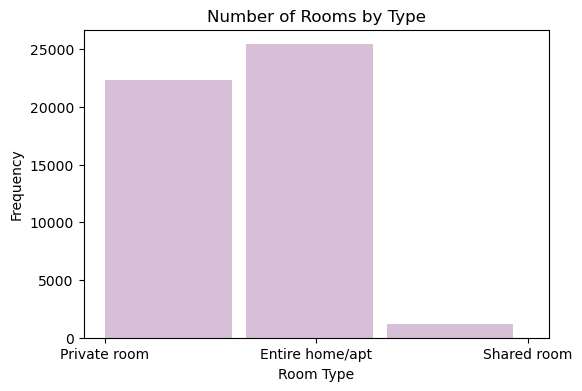

In [9]:
# plotting histogram
color_palette = ['thistle'] 

plt.style.use("default")
plt.figure(figsize=(6,4)) # specify size of the chart
plt.hist(df.room_type, bins = 3, 
         width = 0.6, color = color_palette)

# adding annotations and visuals
plt.xlabel("Room Type")
plt.ylabel("Frequency")
plt.title("Number of Rooms by Type")
plt.show()

Another information that is usefull is what is the average price for every neighbourhood group? Who has the biggest average?

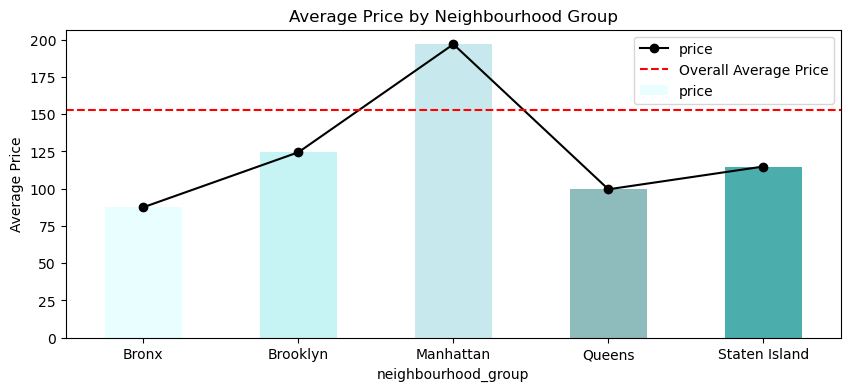

In [10]:
# Group the data by 'neighbourhood_group' and calculate the average price
grouped_data = df.groupby('neighbourhood_group')['price'].mean()
color_palette = ['lightcyan','paleturquoise','powderblue','cadetblue','darkcyan']
mean_price = 152.720687

# Plotting the histogram
fig, ax = plt.subplots(figsize=(10,4))

# Bar plot
grouped_data.plot(kind='bar', ax=ax, alpha=0.7, color=color_palette)
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Average Price')
ax.set_title('Average Price by Neighbourhood Group')

# Line plot
grouped_data.plot(kind='line', ax=ax, marker='o', color='black')
plt.axhline(mean_price, color = "Red",linestyle='--', label = "Overall Average Price")
plt.legend()

plt.legend()
plt.show()

Overall, Manhattan has the most expensive room aboved overall average price followed by Brooklyn, Staten Island, Queens, and Bronx. 

Next, we want to know the average o availability by it's room type to know estimate sales.

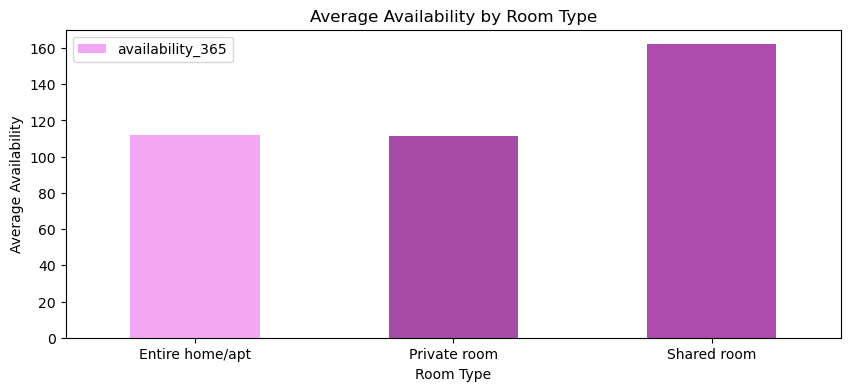

In [11]:
# Group the data by 'room_type' and calculate the average price
grouped_data2 = df.groupby('room_type')['availability_365'].mean()
color_palette = ['violet','purple','darkmagenta']

# Plotting the histogram
fig, ax = plt.subplots(figsize=(10,4))

# Bar plot
grouped_data2.plot(kind='bar', ax=ax, alpha=0.7, color=color_palette)
ax.set_xlabel('Room Type')
ax.set_ylabel('Average Availability')
ax.set_title('Average Availability by Room Type')
plt.xticks(rotation=0)
plt.legend()
plt.show()

Shared room has the longest available day while entire home/apt has the shortest.

Then we come up with some question. 

What is the spread of price for every type of neighbourhood group?

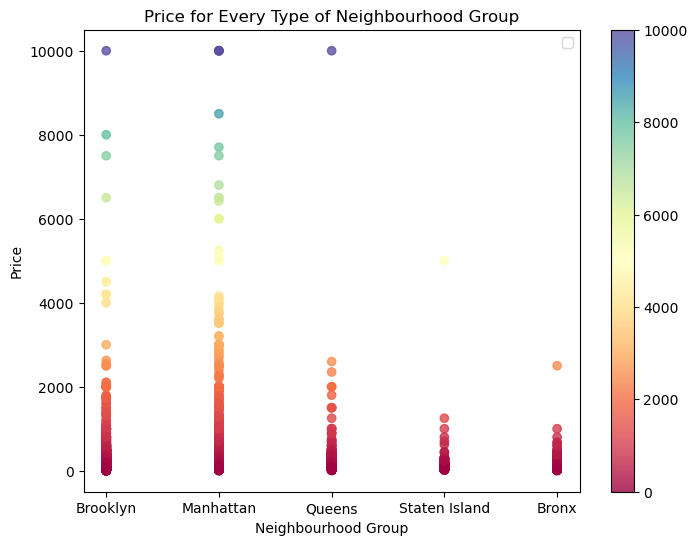

In [12]:
# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6)) # Specify size of the chart
plt.scatter(df.neighbourhood_group,df.price, 
            alpha = 0.8, c = df.price,
            cmap = "Spectral")


plt.colorbar(orientation = "vertical")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price")
plt.title("Price for Every Type of Neighbourhood Group")
plt.legend()
plt.show()

From the scatter plot, we can get informations such as:
1. Price from 0-1000 piled on every single neighbourhood group.
2. Brooklyn, Manhattan, and Queens have the most expensive room at price 10000.

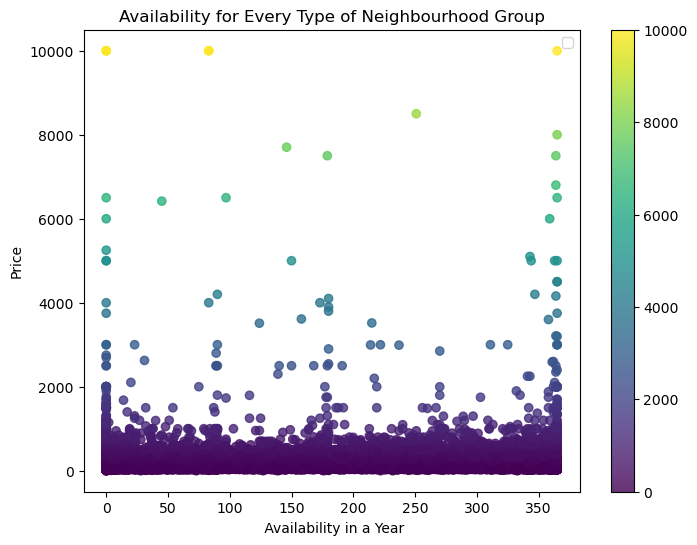

In [13]:
# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6)) # Specify size of the chart
plt.scatter(df.availability_365,df.price, 
            alpha = 0.8, c = df.price,
            cmap = "viridis")


plt.colorbar(orientation = "vertical")
plt.xlabel(" Availability in a Year")
plt.ylabel("Price")
plt.title("Availability for Every Type of Neighbourhood Group")
plt.legend()
plt.show()

Fron the scatter plot above, 
1. There is no correlation between price and the availability of rooms in a year.
2. Dots piled up when price between 0 until 1000. It means many rooms with a price 0 until 1000 have many different level of availability,

Last, we want to find five top hosts.

In [14]:
# Searching for top host 
count_host = df.host_id.value_counts(normalize=False, sort=True, ascending=False, bins=None)
count_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64

In [15]:
# Limit to top 5
top_host = count_host.head(5)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
Name: host_id, dtype: int64

We have the list, but to plot it, the list should have a header and set the original index.

In [16]:
# Reset the index to include the original index as a column
top_host = top_host.reset_index()

# Rename the columns to 'host_id' and 'count'
top_host.columns = ['host_id', 'count']

top_host

,host_id,count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96


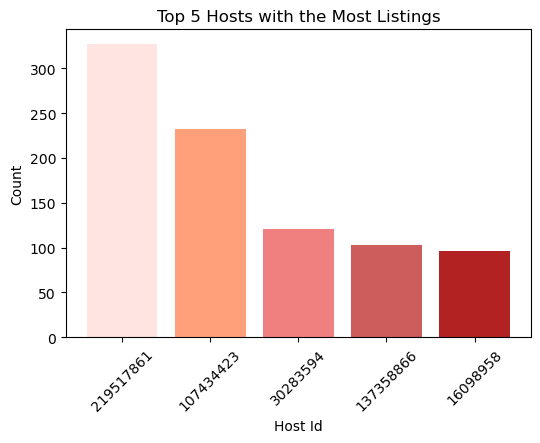

In [17]:
# plotting histogram
top_host['host_id'] = top_host['host_id'].astype(str)
color_palette = ['mistyrose','lightsalmon','lightcoral','indianred','firebrick'] 

plt.style.use("default")
plt.figure(figsize=(6,4)) # specify size of the chart
plt.bar(top_host['host_id'],top_host['count'], color = color_palette)

# adding annotations and visuals
plt.xlabel("Host Id")
plt.ylabel("Count")
plt.title("Top 5 Hosts with the Most Listings")

# Rotating the x-axis labels for better visibility if needed
plt.xticks(rotation=45)

plt.show()

We already have the graph, but to it's difficult to do the analysis. To know that, we will find the name first.

In [18]:
host_name1 = df.loc[df['host_id'] == 219517861, 'host_name'].values[0]
host_place1 = df.loc[df['host_id'] == 219517861, 'neighbourhood_group'].values[0]
print("Id 219517861 is",host_name1, "in", host_place1)
host_name2 = df.loc[df['host_id'] == 107434423, 'host_name'].values[0]
host_place2 = df.loc[df['host_id'] == 107434423, 'neighbourhood_group'].values[0]
print("Id 107434423 is",host_name2, "in", host_place2)
host_name3 = df.loc[df['host_id'] == 30283594, 'host_name'].values[0]
host_place3 = df.loc[df['host_id'] == 30283594, 'neighbourhood_group'].values[0]
print("Id 30283594 is", host_name3, "in", host_place3)
host_name4 = df.loc[df['host_id'] == 137358866, 'host_name'].values[0]
host_place4 = df.loc[df['host_id'] == 137358866, 'neighbourhood_group'].values[0]
print("Id 137358866 is",host_name4, "in", host_place4)
host_name5 = df.loc[df['host_id'] == 16098958, 'host_name'].values[0]
host_place5 = df.loc[df['host_id'] == 16098958, 'neighbourhood_group'].values[0]
print("Id 16098958 is",host_name5, "in", host_place5)

Id 219517861 is Sonder (NYC) in Manhattan
Id 107434423 is Blueground in Manhattan
Id 30283594 is Kara in Manhattan
Id 137358866 is Kazuya in Manhattan
Id 16098958 is Jeremy & Laura in Manhattan


The host who has the most listing is Sonder (NYC) followed by Blueground, Kara, Kazuya, and Jeremy & Laura. There are only a slight difference between Kara, Kazuya, and Jeremy & Laura.

# CONCLUSION

After series of analysis, we have come to a conclusion. These are a few insight that we can get from analysis section.

**1. To find top 5 listing hosts and their places.**

The top 5 hosts is Sonder(NYC), Blueground, Kara, Kazuya, and Jeremy & Laura. All of them host places in Manhattan.

**2. To find a suitable place to open airbnb.**

If someone want to open airbnb with a high price, Manhataan is the suitable place.

According to the graph, Manhataan has a bigger average price than overall average price. Meanwhile, the other four are below overall average price. You may consider to open share room because there are only a few. But, the availability graph show that a high number. Then, you might want to open private room. Although it's availability is slightly higher than private room, the difference of number between them rather big. For the price, you can put between 190-200 for a safe price. The scatter plot show that the amount of room above 4500 are under 10. 

**The most safe plan is open a private room with a price range between 190-200 in Manhattan**